Data Set from https://cseweb.ucsd.edu/~jmcauley/datasets/amazon_v2/

In [6]:
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import gzip
import json

In [7]:
def parse(path):
  g = gzip.open(path, 'r')
  for l in g:
    yield json.loads(l)

In [5]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('Software.json.gz')

In [8]:
df

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4.0,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,{'Format:': ' Loose Leaf'},Michelle W,The materials arrived early and were in excell...,Material Great,1394496000,NaN,NaN
1,4.0,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,{'Format:': ' Loose Leaf'},Rosalind White Ames,I am really enjoying this book with the worksh...,Health,1393113600,NaN,NaN
2,1.0,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,{'Format:': ' Loose Leaf'},Allan R. Baker,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",ARE YOU KIDING ME?,1392595200,7,NaN
3,3.0,True,"02 17, 2014",APRDVZ6QBIQXT,0077613252,{'Format:': ' Loose Leaf'},Lucy,This book was missing pages!!! Important pages...,missing pages!!,1392595200,3,NaN
4,5.0,False,"10 14, 2013",A2JZTTBSLS1QXV,0077775473,NaN,Albert V.,I have used LearnSmart and can officially say ...,Best study product out there!,1381708800,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
459431,2.0,True,"11 29, 2016",AGEWYJ2NF5C2H,B01HF41TKI,NaN,Bonita Alferes,No instructions.....No Help unless you want to...,Two Stars,1480377600,NaN,NaN
459432,1.0,True,"03 1, 2018",A3VCFV8WEQG9R5,B01HF3G4BS,NaN,mekonen,it's a joke,One Star,1519862400,NaN,NaN
459433,5.0,True,"12 2, 2017",A3DXGHJF6SOHNC,B01HF3G4BS,NaN,bbeckham,I have multiple licenses of the Antivirus. I h...,This is very effective antivirus software.,1512172800,NaN,NaN
459434,5.0,True,"09 15, 2018",A1WOS4D7QA06DO,B01HJAMWOK,NaN,Charles E. Potter,good value,Five Stars,1536969600,NaN,NaN


In [9]:
new_df = df[['overall','reviewText']]
new_df

,overall,reviewText
0,4.0,The materials arrived early and were in excell...
1,4.0,I am really enjoying this book with the worksh...
2,1.0,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ..."
3,3.0,This book was missing pages!!! Important pages...
4,5.0,I have used LearnSmart and can officially say ...
...,...,...
459431,2.0,No instructions.....No Help unless you want to...
459432,1.0,it's a joke
459433,5.0,I have multiple licenses of the Antivirus. I h...
459434,5.0,good value


In [10]:
new_df.isnull().any()

overall       False
reviewText     True
dtype: bool

In [11]:
clean_df = new_df.dropna(axis=0).reset_index(drop=True)

In [12]:
clean_df.isnull().any()

overall       False
reviewText    False
dtype: bool

In [13]:
clean_df["overall"] = np.where(clean_df["overall"] <= 3, 0, 1)

In [14]:
clean_df

,overall,reviewText
0,1,The materials arrived early and were in excell...
1,1,I am really enjoying this book with the worksh...
2,0,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ..."
3,0,This book was missing pages!!! Important pages...
4,1,I have used LearnSmart and can officially say ...
...,...,...
459365,0,No instructions.....No Help unless you want to...
459366,0,it's a joke
459367,1,I have multiple licenses of the Antivirus. I h...
459368,1,good value


In [15]:
num_ex = len(clean_df)
slicing = int(0.8*num_ex)
print(slicing)

train_df = clean_df.iloc[:slicing, :]
test_df = clean_df.iloc[slicing:, :]

print(f"Train dataset's shape : {train_df.shape}")
print(f"Test dataset's shape : {test_df.shape}")

367496
Train dataset's shape : (367496, 2)
Test dataset's shape : (91874, 2)


In [16]:
train_df

,overall,reviewText
0,1,The materials arrived early and were in excell...
1,1,I am really enjoying this book with the worksh...
2,0,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ..."
3,0,This book was missing pages!!! Important pages...
4,1,I have used LearnSmart and can officially say ...
...,...,...
367491,1,This game was my childhood soul.\n\n;/\
367492,0,This product does not work with my computer. V...
367493,0,This is NOT the Treasure of knowledge game tha...
367494,1,what memories - great stuff !


In [17]:
test_df

,overall,reviewText
367496,0,exactly what i wanted thank you.
367497,1,good game for kids
367498,0,"Fun game, not the one I had as a kid though. E..."
367499,0,This DOES NOT WORK WITH THE SOFTWARE IT SAYS I...
367500,0,My grandaughter ( 10 yrs old) liked it but I d...
...,...,...
459365,0,No instructions.....No Help unless you want to...
459366,0,it's a joke
459367,1,I have multiple licenses of the Antivirus. I h...
459368,1,good value


In [18]:
train_Y = np.array(train_df['overall'])
test_Y = np.array(test_df['overall'])

train_Y
#test_Y

array([1, 1, 0, ..., 0, 1, 0])

In [19]:
train_text_X = train_df['reviewText'].values.tolist()
test_text_X = test_df['reviewText'].values.tolist()


In [20]:
# Change to .iloc feature

def clean_str_pandas(df, text_column):
    df[text_column] = df[text_column].str.replace(r"[^A-Za-z0-9(),!?\'\`]", " ", regex=True)
    df[text_column] = df[text_column].str.replace(r"\'s", " \'s", regex=True)
    df[text_column] = df[text_column].str.replace(r"\'ve", " \'ve", regex=True)
    df[text_column] = df[text_column].str.replace(r"n\'t", " n\'t", regex=True)
    df[text_column] = df[text_column].str.replace(r"\'re", " \'re", regex=True)
    df[text_column] = df[text_column].str.replace(r"\'d", " \'d", regex=True)
    df[text_column] = df[text_column].str.replace(r"\'ll", " \'ll", regex=True)
    df[text_column] = df[text_column].str.replace(r",", " , ", regex=True)
    df[text_column] = df[text_column].str.replace(r"!", " ! ", regex=True)
    df[text_column] = df[text_column].str.replace(r"\(", " \( ", regex=True)
    df[text_column] = df[text_column].str.replace(r"\)", " \) ", regex=True)
    df[text_column] = df[text_column].str.replace(r"\?", " \? ", regex=True)
    df[text_column] = df[text_column].str.replace(r"\s{2,}", " ", regex=True)
    df[text_column] = df[text_column].str.replace(r"\'", "", regex=True)
    df[text_column] = df[text_column].str.lower().str.strip()

    return df

In [21]:
train_clean = clean_str_pandas(train_df, 'reviewText')
test_clean = clean_str_pandas(test_df, 'reviewText')

<ipython-input-20-3e26f48b5d67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[text_column] = df[text_column].str.replace(r"[^A-Za-z0-9(),!?\'\`]", " ", regex=True)
<ipython-input-20-3e26f48b5d67>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[text_column] = df[text_column].str.replace(r"\'s", " \'s", regex=True)
<ipython-input-20-3e26f48b5d67>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [22]:
train_text_X = train_clean['reviewText'].values.tolist()
test_text_X = test_clean['reviewText'].values.tolist()

print(len(train_text_X))
print(type(train_text_X))

print(train_text_X[0])
print(test_text_X[0])

367496
<class 'list'>
the materials arrived early and were in excellent condition however for the money spent they really should ve come with a binder and not just loose leaf
exactly what i wanted thank you


In [23]:
# Train to list with words
train_sentences = [str(sentence).split(' ') for sentence in train_text_X]

test_sentences = [str(sentence).split(' ') for sentence in test_text_X]

In [24]:
for i in range(5):
    print(test_sentences[i])

for i in range(5):
    print(train_sentences[i])

['exactly', 'what', 'i', 'wanted', 'thank', 'you']
['good', 'game', 'for', 'kids']
['fun', 'game', ',', 'not', 'the', 'one', 'i', 'had', 'as', 'a', 'kid', 'though', 'even', 'though', 'it', 's', 'an', 'older', 'game', 'my', 'daughter', 'loves', 'it']
['this', 'does', 'not', 'work', 'with', 'the', 'software', 'it', 'says', 'it', 'does', '!', '!', 'do', 'not', 'buy', 'it', '!', '!']
['my', 'grandaughter', '\\(', '10', 'yrs', 'old', '\\)', 'liked', 'it', 'but', 'i', 'did', 'nt', 'get', 'the', 'old', 'version', 'as', 'i', 'expected', 'i', 'saw', 'an', 'old', 'version', 'that', 'came', 'with', 'a', 'help', 'book', 'thats', 'what', 'i', 'was', 'looking', 'for']
['the', 'materials', 'arrived', 'early', 'and', 'were', 'in', 'excellent', 'condition', 'however', 'for', 'the', 'money', 'spent', 'they', 'really', 'should', 've', 'come', 'with', 'a', 'binder', 'and', 'not', 'just', 'loose', 'leaf']
['i', 'am', 'really', 'enjoying', 'this', 'book', 'with', 'the', 'worksheets', 'that', 'make', 'you', 

In [25]:
less_100 = 0
for i in range(len(train_sentences)):
  if len(train_sentences[i]) < 100:
    less_100 += 1
  else:
    continue

print(less_100)
ratio = less_100 / len(train_sentences)
print(ratio)

print(train_sentences[i])

# Approx. 75% of 80% of entire data with less then 100 words

276424
0.7521823366784944
['it', 'was', 'not', 'the', 'version', 'i', 'was', 'looking', 'for']


In [26]:
new_text = []
for i in train_sentences:
    new_text.append(i[:100])
train_sentences = new_text

In [27]:
new_text = []
for i in test_sentences:
    new_text.append(i[:100])
sentences = new_text

In [28]:
num_words=30000
tokenizer = Tokenizer(num_words)

tokenizer.fit_on_texts(train_sentences)

train_X = tokenizer.texts_to_sequences(train_sentences)

train_X = pad_sequences(train_X, padding='post')

print(train_X[:5])

[[    1  2759   693   901     5   143    19   252  1525   197     9     1
    124   454    44   107   195    84   415    15     7  9088     5    18
     57  2828  9770     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    2    79   107  1916    10   477    15     1  4021    14   152    16
    310    66  4155     4    72     3    27    62    16    27    18   152
      6     4     6  3477    37    11    12  2644 17510     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0    

In [29]:
test_X = tokenizer.texts_to_sequences(sentences)
test_X = pad_sequences(test_X, padding='post')

In [30]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(30000, 400, input_length=100),
  tf.keras.layers.LSTM(units=50),
  tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 400)          12000000  
                                                                 
 lstm (LSTM)                 (None, 50)                90200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 12090302 (46.12 MB)
Trainable params: 12090302 (46.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
history = model.fit(train_X, train_Y, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
2297/2297 [==============================] - 1203s 523ms/step - loss: 0.3701 - accuracy: 0.8329 - val_loss: 0.2525 - val_accuracy: 0.8961
Epoch 2/5
2297/2297 [==============================] - 1201s 523ms/step - loss: 0.2617 - accuracy: 0.8904 - val_loss: 0.2400 - val_accuracy: 0.9025
Epoch 3/5
2297/2297 [==============================] - 1206s 525ms/step - loss: 0.2204 - accuracy: 0.9105 - val_loss: 0.2442 - val_accuracy: 0.9021
Epoch 4/5
2297/2297 [==============================] - 1216s 530ms/step - loss: 0.1827 - accuracy: 0.9275 - val_loss: 0.2542 - val_accuracy: 0.9028
Epoch 5/5
2297/2297 [==============================] - 1229s 535ms/step - loss: 0.1482 - accuracy: 0.9430 - val_loss: 0.2785 - val_accuracy: 0.8994


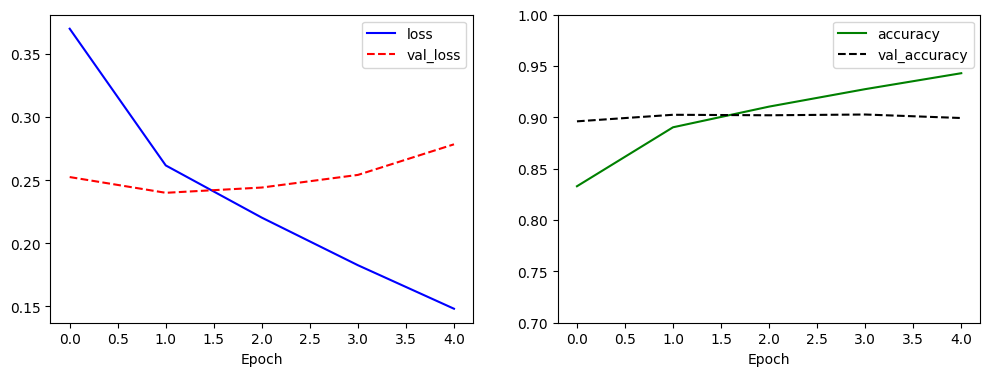

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

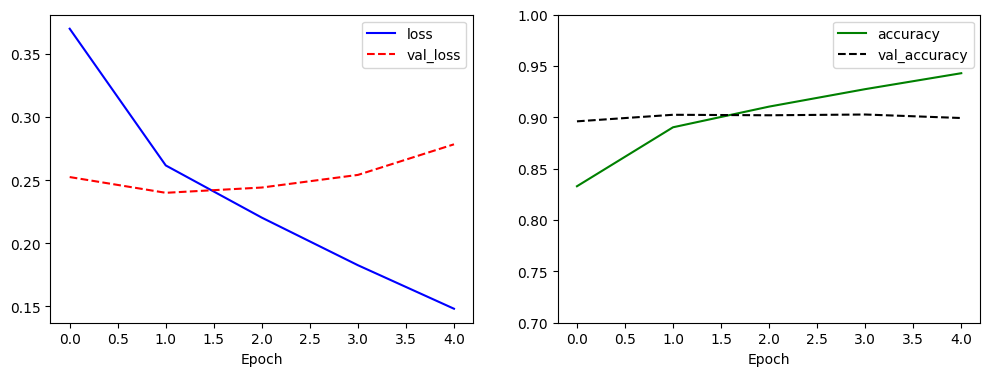

In [33]:

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [34]:
model.evaluate(test_X, test_Y, verbose=1)

2872/2872 [==============================] - 109s 38ms/step - loss: 0.3776 - accuracy: 0.8692


[0.3775984048843384, 0.8691903948783875]

In [51]:
#testing_sentence = 'Im trying to find out the word about this product, it has acceptable quality beyond the its price'
testing_sentence = 'That was sleepy but very fun and excellent'
testing_sentence = testing_sentence.split(' ')
try_sentences = []
now_sentence = []
for word in testing_sentence:
    now_sentence.append(word)
    try_sentences.append(now_sentence[:])

test_X_sample = tokenizer.texts_to_sequences(try_sentences)
test_X_sample = pad_sequences(test_X_sample, padding='post', maxlen=100)
prediction = model.predict(test_X_sample)

inPercentage = round(prediction[-1][1] * 100, 2)
print(f'Percentage of postive is {inPercentage}%')


1/1 [==============================] - 0s 33ms/step
Percentage of postive is 99.45%


In [52]:
inPercentagePos = round(prediction[-1][1] * 100, 2)
inPercentageNeg = round(prediction[-1][0] * 100, 2)

if prediction[-1][0] < 0.5:
  print(f'Percentage of postive is {inPercentagePos}%')
else:
  print(f'Percentage of neg is {inPercentageNeg}%')


Percentage of postive is 99.45%
